                                                                                     Data Science
                                                                                        Midterm

In [1]:
#Importing lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/Users/pratiksha/Downloads/checkout_status.csv')

In [3]:
df.head()

,Unnamed: 0,userID,age,days_since_registration,time_spent,pages_visited,cart_items,cart_value,average_product_rating,checkout_status,device,location
0,0,1,62,43,29.506439,8,21,343.250605,3.248112,0,Desktop,Location 4
1,1,2,65,62,42.119580,10,7,88.563660,1.083489,0,Mobile,Location 1
2,2,3,18,118,5.000000,1,8,75.601267,4.910601,0,Desktop,Location 1
3,3,4,21,66,28.053976,6,19,213.207868,1.249777,0,Desktop,Location 5
4,4,5,21,1,22.865723,4,5,67.856206,2.305883,0,Tablet,Location 5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               5000 non-null   int64  
 1   userID                   5000 non-null   int64  
 2   age                      5000 non-null   int64  
 3   days_since_registration  5000 non-null   int64  
 4   time_spent               5000 non-null   float64
 5   pages_visited            5000 non-null   int64  
 6   cart_items               5000 non-null   int64  
 7   cart_value               5000 non-null   float64
 8   average_product_rating   5000 non-null   float64
 9   checkout_status          5000 non-null   int64  
 10  device                   4990 non-null   object 
 11  location                 4970 non-null   object 
dtypes: float64(3), int64(7), object(2)
memory usage: 468.9+ KB


In [5]:
df.drop('Unnamed: 0', axis=1, inplace = True) # part of Data Cleaning

Let's check the data distribution

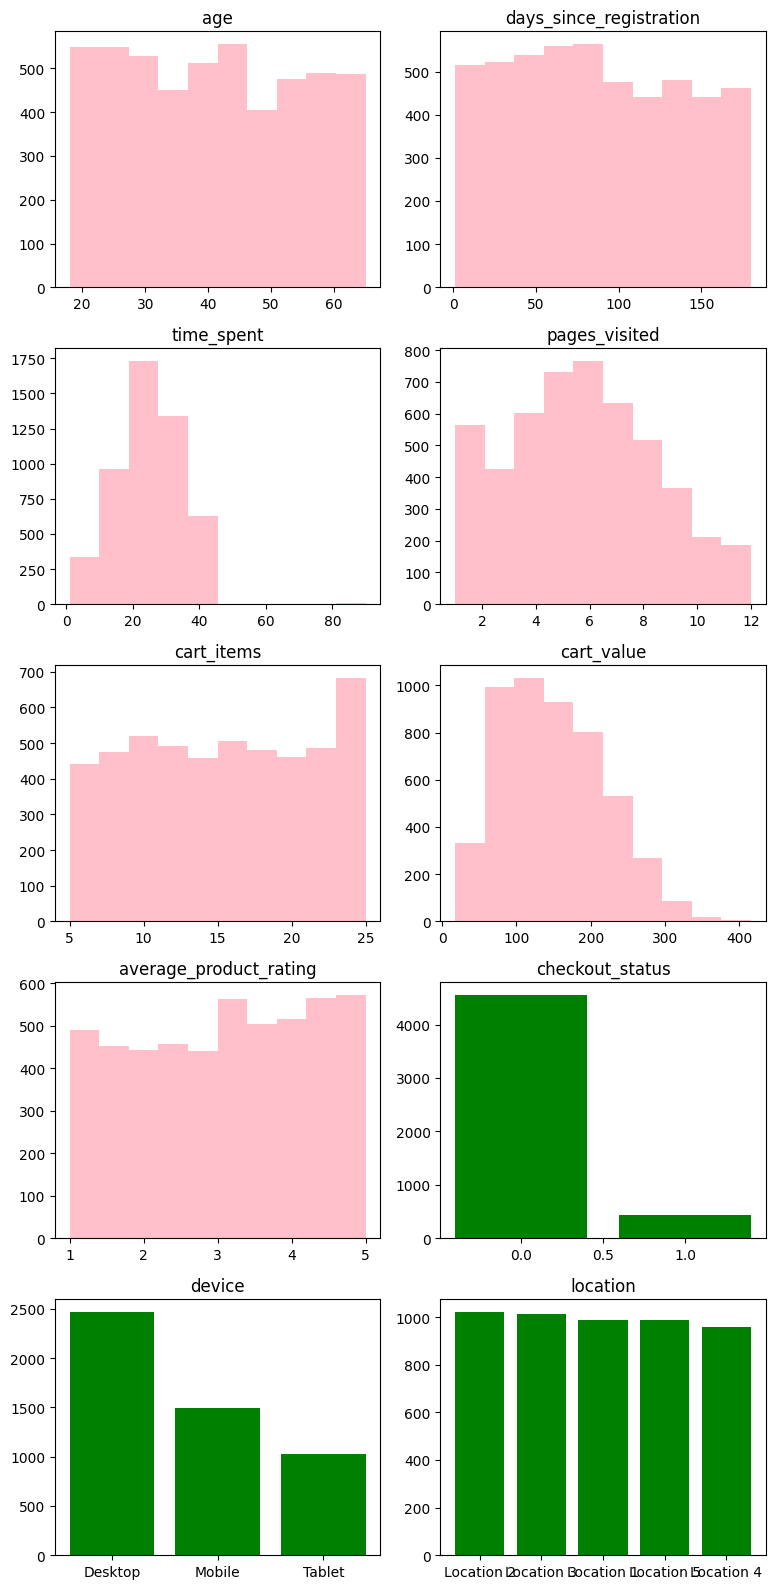

In [6]:
fig, axs = plt.subplots(5, 2, figsize=(8, 16))

numerical_columns = ['age', 'days_since_registration', 'time_spent', 'pages_visited', 'cart_items', 'cart_value', 'average_product_rating']
for i, col in enumerate(numerical_columns):
    axs[i // 2, i % 2].hist(df[col], bins=10, color='pink')
    axs[i // 2, i % 2].set_title(col)

categorical_columns = ['checkout_status', 'device', 'location']
for i, col in enumerate(categorical_columns):
    axs[(i + len(numerical_columns)) // 2, (i + len(numerical_columns)) % 2].bar(
        df[col].value_counts().index, df[col].value_counts().values, color='green'
    )
    axs[(i + len(numerical_columns)) // 2, (i + len(numerical_columns)) % 2].set_title(col)
plt.tight_layout()
plt.show()

In [7]:
df.describe(include = 'all')

,userID,age,days_since_registration,time_spent,pages_visited,cart_items,cart_value,average_product_rating,checkout_status,device,location
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,4990,4970
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 2
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2473,1023
mean,2500.500000,40.871000,87.277000,25.135269,5.773600,14.97700,149.920803,3.086910,0.087800,NaN,NaN
std,1443.520003,13.819485,51.374844,9.885813,2.555083,5.98358,68.370036,1.167695,0.283032,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.00000,17.525105,1.000922,0.000000,NaN,NaN
25%,1250.750000,29.000000,43.000000,18.512951,4.000000,10.00000,94.017655,2.089874,0.000000,NaN,NaN
50%,2500.500000,41.000000,84.000000,25.002948,6.000000,15.00000,143.727232,3.161191,0.000000,NaN,NaN
75%,3750.250000,53.000000,131.000000,31.751703,8.000000,20.00000,197.906171,4.124172,0.000000,NaN,NaN


In [8]:
df = df.dropna() # part of Data Cleaning

In [9]:
df.info()# part of Data Cleaning

<class 'pandas.core.frame.DataFrame'>
Index: 4960 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   userID                   4960 non-null   int64  
 1   age                      4960 non-null   int64  
 2   days_since_registration  4960 non-null   int64  
 3   time_spent               4960 non-null   float64
 4   pages_visited            4960 non-null   int64  
 5   cart_items               4960 non-null   int64  
 6   cart_value               4960 non-null   float64
 7   average_product_rating   4960 non-null   float64
 8   checkout_status          4960 non-null   int64  
 9   device                   4960 non-null   object 
 10  location                 4960 non-null   object 
dtypes: float64(3), int64(6), object(2)
memory usage: 465.0+ KB


In [10]:
df.drop_duplicates(inplace=True) # part of Data Cleaning

It's OK to lose this data because we only lost a total of 40 values, or 0.8 percent, of the data. 

In [11]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 4960 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   userID                   4960 non-null   int64  
 1   age                      4960 non-null   int64  
 2   days_since_registration  4960 non-null   int64  
 3   time_spent               4960 non-null   float64
 4   pages_visited            4960 non-null   int64  
 5   cart_items               4960 non-null   int64  
 6   cart_value               4960 non-null   float64
 7   average_product_rating   4960 non-null   float64
 8   checkout_status          4960 non-null   int64  
 9   device                   4960 non-null   object 
 10  location                 4960 non-null   object 
dtypes: float64(3), int64(6), object(2)
memory usage: 465.0+ KB


EDA

In [12]:
# Time spent by users per location
df.groupby('location')[['time_spent']].median()

,time_spent
location,
Location 1,24.975821
Location 2,25.151063
Location 3,25.110216
Location 4,24.714695
Location 5,25.086324


In [13]:
# Number of users per location
df.groupby('location')[['userID']].count()

,userID
location,
Location 1,986
Location 2,1022
Location 3,1011
Location 4,954
Location 5,987


In [14]:
# Count of users per device type
df.groupby('device')[['userID']].count()

,userID
device,
Desktop,2458
Mobile,1481
Tablet,1021


In [15]:
# Time spen by users per device type
df.groupby('device')[['time_spent']].median()

,time_spent
device,
Desktop,24.842950
Mobile,25.218516
Tablet,25.059359


The distribution of users who are checking out compared to those who are not, by device and location.


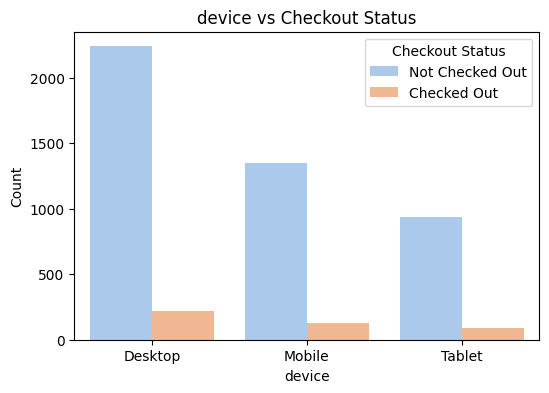

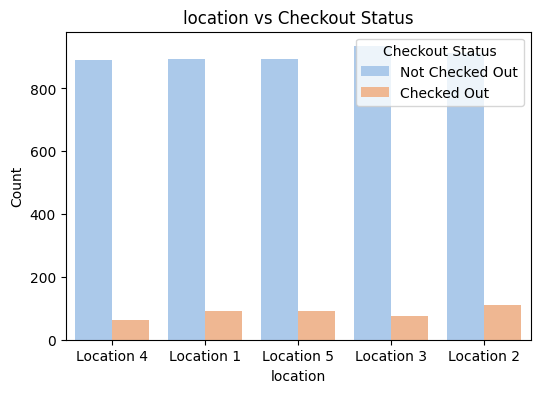

In [16]:
categorical_columns = ['checkout_status', 'device', 'location']
for col in categorical_columns:
    if col != 'checkout_status':
        plt.figure(figsize=(6, 4))
        sns.countplot(data=df, x=col, hue='checkout_status', palette='pastel')
        plt.title(f'{col} vs Checkout Status')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.legend(title='Checkout Status', labels=['Not Checked Out', 'Checked Out'])
        plt.show()

In [17]:
df.groupby('checkout_status').count()

,userID,age,days_since_registration,time_spent,pages_visited,cart_items,cart_value,average_product_rating,device,location
checkout_status,,,,,,,,,,
0,4526,4526,4526,4526,4526,4526,4526,4526,4526,4526
1,434,434,434,434,434,434,434,434,434,434


Conducting bivariate analysis for users who are checkning out or not in comparision to the mentioned numerical variable from our data.

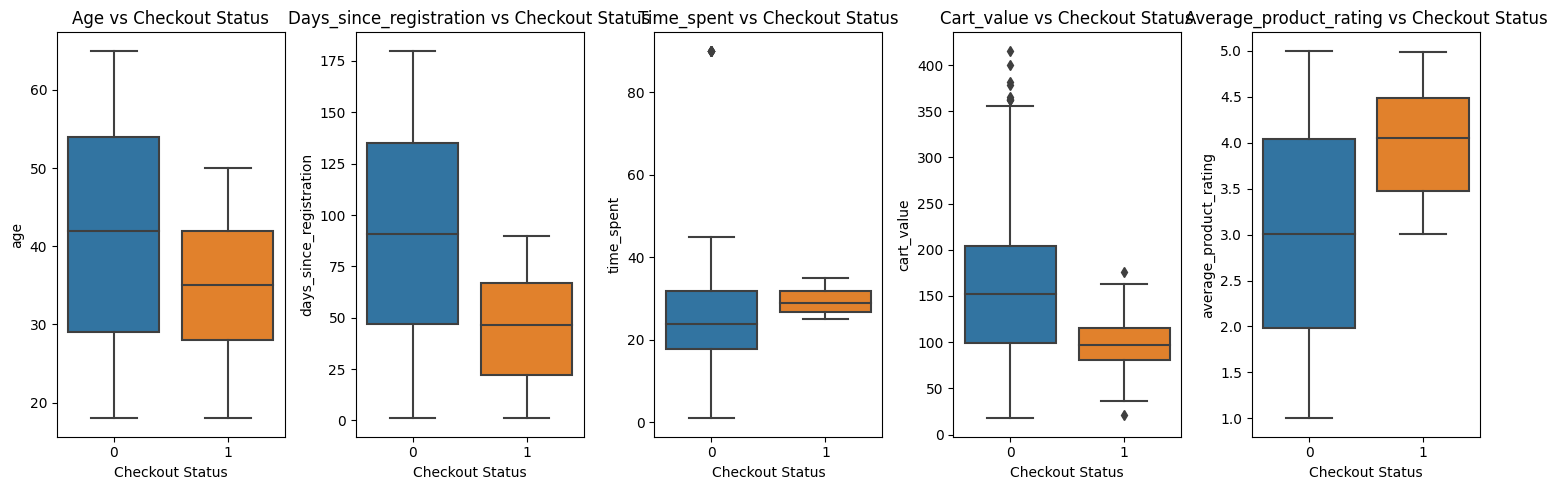

In [18]:
numerical_columns = ['age', 'days_since_registration', 'time_spent', 'cart_value', 'average_product_rating']

num_subplots = len(numerical_columns)

num_rows = 1
num_cols = num_subplots

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))

if num_subplots == 1:
    axes = [axes]

for col, ax in zip(numerical_columns, axes):
    sns.boxplot(x='checkout_status', y=col, data=df, ax=ax)
    ax.set_title(f'{col.capitalize()} vs Checkout Status')
    ax.set_xlabel('Checkout Status')
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()


In [19]:
df.columns

Index(['userID', 'age', 'days_since_registration', 'time_spent',
       'pages_visited', 'cart_items', 'cart_value', 'average_product_rating',
       'checkout_status', 'device', 'location'],
      dtype='object')

In [20]:
for i in ['device','location']:
    print(df.groupby([i,'checkout_status'])['userID'].count().unstack())
    print('---------------------------------------------')

checkout_status     0    1
device                    
Desktop          2239  219
Mobile           1352  129
Tablet            935   86
---------------------------------------------
checkout_status    0    1
location                 
Location 1       893   93
Location 2       913  109
Location 3       934   77
Location 4       891   63
Location 5       895   92
---------------------------------------------


In [21]:
for i in ['pages_visited']:
    print(df.groupby([i,'checkout_status'])['userID'].count().unstack())
    print('---------------------------------------------')

checkout_status      0      1
pages_visited                
1                257.0    NaN
2                299.0    NaN
3                423.0    NaN
4                588.0    9.0
5                672.0   52.0
6                648.0  116.0
7                503.0  126.0
8                426.0   88.0
9                321.0   40.0
10               206.0    3.0
11               128.0    NaN
12                55.0    NaN
---------------------------------------------


----------------------------------------------------------------------------------------------------------------------------

1) Characteristics of users who complete check out vs those who do not is as follows - 

- During the course of my exploratory data analysis (EDA), a comprehensive bivariate analysis yielded nuanced insights that hold potential strategic implications:

- Age and Checkout_status: People between 30 and 42 years old tend to buy things more often compared to other age groups. So, focusing on this age range could help increase sales.

- Time Since Registration and Checkout_status: Many people who signed up between 25 and 60 days ago are buying things. After that, the number of people buying starts to go down. This shows that we should pay attention to engaging new users within this timeframe.

- Device, Location, and Checkout_status: People using desktop computers are more likely to buy than those using mobiles or tablets. Also, location 2 has the most checkouts, while location 4 has the least after people visit our website.

- Time Spent and Checkout_status: It's not surprising that people who spend more time on the website are more likely to buy things. This just confirms that keeping users engaged is important for sales.

- Cart Value and Checkout_status: Something interesting here – people with items totaling between $90 and $120 in their cart tend to buy more. This is different from what we might expect, so we need to figure out why.

- Average Product Ratings and Checkout_status: When people have items in their cart with higher ratings, they tend to buy more. This makes sense, as people trust well-rated products.

2) How did you prepare your data for analysis? Describe your data cleaning and preparation approaches, and why these were the best choices.

- My approach to data cleaning involved several steps. First, I excluded the 'unnamed' column from the dataset due to its lack of meaningful information. Next, I conducted an analysis of null values within the 'device' and 'location' columns, identifying 10 and 30 null values respectively. Given that these null values represented blank records and accounted for less than 10% of the total dataset, I opted to eliminate them entirely. Subsequently, I performed a check for duplicate entries in the dataset, and fortunately, no duplicates were found.

Basic Observations - 

- Upon conducting a comprehensive analysis of the dataset, several noteworthy observations have come to light:

- Age Distribution: The age distribution of the users is remarkably well-balanced, spanning an even range from 18 to 65 years.

- Time Spent Distribution: The distribution of time spent on the platform appears to be right-skewed, implying that a majority of users tend to spend relatively less time, while a smaller segment engages for more extended periods.

- Pages Visited: The data pertaining to the number of pages visited by users exhibits a uniform distribution. Notably, the maximum number of pages visited by an individual user remains at six.

- Checkout Status Disparity: Analysis of the checkout status reveals an uneven distribution between the values of 0 and 1. The prevalence of 0 values exceeds that of 1 values, potentially indicating data quality concerns. Should the accuracy of this data be confirmed, it could still serve as a basis for deriving valuable recommendations.

- Device and Location Usage: The dataset reflects a clear preference for the desktop platform, as it is the most frequently utilized device. Concurrently, the geographical distribution of users across various locations is relatively uniform.

- Time Spent by Location: An examination of time spent by users across different locations shows an even distribution, suggesting consistent user engagement regardless of location.

- Geographical Popularity: Location 2 boasts the highest user concentration, while Location 4 registers the fewest number of users.

- Device vs. Time Spent: Despite the higher count of users employing desktop devices, the time spent by users appears to be evenly distributed across all listed devices.

3) What recommendations do you have for the product team? What should they do next? Be specific (i.e., who should they target, why and how). 

- Based on the insights gathered from the data analysis, here are specific recommendations that the Product team could consider to improve the checkout rate and address the issue of users not completing their purchases:

    - Targeting Age Groups: Focus marketing efforts on users aged between 30 and 42 years, as they show a higher propensity to make purchases. This could involve tailored promotions, content, or offers that resonate with this age group.

    - Engagement for New Users: Pay special attention to engaging new users within the first 60 days after registration. Implement onboarding processes, personalized recommendations, and incentives to encourage their purchasing behavior.

    - Device Optimization: Since desktop users have a higher likelihood of making purchases compared to mobile or tablet users, consider optimizing the website experience specifically for desktop users. Ensure that the website is responsive, easy to navigate, and provides a seamless checkout process on desktop devices.

    - Location-Based Strategies: Develop targeted marketing campaigns for different locations. While location 2 has the highest number of checkouts, explore strategies to improve engagement and conversion rates in location 4, where checkouts are relatively lower.

    - Time Spent Engagement: Enhance user engagement strategies to encourage longer time spent on the platform. This could involve implementing interactive content, personalized recommendations, or loyalty programs to keep users engaged and increase the likelihood of making a purchase.

    - Understanding Cart Value: Investigate the reasons behind the trend of users with cart values between $90 and $120 making more purchases. This could involve analyzing the product mix, pricing strategies, or potential bundling options to optimize the cart value and encourage purchases.

    - Product Ratings Importance: Emphasize well-rated products and showcase customer reviews. This could instill trust and confidence in users, encouraging them to make purchases.
    
    - Geographical Strategies: Leverage the popularity of location 2 by offering targeted promotions, localized content, or location-specific incentives. Similarly, implement strategies to increase user engagement and conversion in location 4.

    - Segmentation and Personalization: Utilize the insights gained from your analysis to segment users based on various characteristics such as age, device, and location. Create personalized experiences and offers for different user segments to enhance their shopping journey.

----------------------------------------------------------------------------------------------------------------------------